In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
url = 'https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/advertising.csv'
df = pd.read_csv(url)
df.info()
#Todos los datos son de tipo float64 y no hay ningun dato nulo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
#Separamos los datos en datos de prueba y datos de entrenamiento
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 79 to 102
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         160 non-null    float64
 1   Radio      160 non-null    float64
 2   Newspaper  160 non-null    float64
 3   Sales      160 non-null    float64
dtypes: float64(4)
memory usage: 6.2 KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 95 to 76
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         40 non-null     float64
 1   Radio      40 non-null     float64
 2   Newspaper  40 non-null     float64
 3   Sales      40 non-null     float64
dtypes: float64(4)
memory usage: 1.6 KB


In [ ]:
""" Crear un pipeline, dentro del pipeline un imputer que reemplaza los valores
faltantes por la media de la columna y una instancia del StandardScaler para
ajustar los datos"""

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    #('model_ols', LinearRegression())
    #('model_sgd', SGDRegressor())
])

processed_train_data = pd.DataFrame(pipeline.fit_transform(train_data), columns=train_data.columns)

In [ ]:
processed_train_data.describe()

,TV,Radio,Newspaper,Sales
count,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02
mean,-2.942091e-16,-2.081668e-16,1.665335e-17,-2.720046e-16
std,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00
min,-1.774345e+00,-1.549957e+00,-1.462335e+00,-2.652333e+00
25%,-8.587688e-01,-8.842559e-01,-8.420458e-01,-7.254707e-01
50%,7.493646e-03,-1.135334e-01,-2.143574e-01,1.679364e-01
75%,8.176095e-01,9.180491e-01,7.179263e-01,7.184683e-01
max,1.739424e+00,1.810732e+00,3.499979e+00,2.254163e+00


In [ ]:
processed_train_data

,TV,Radio,Newspaper,Sales
0,-0.404248,-1.028237,-0.337675,-0.836543
1,0.320608,-0.919828,-1.161439,-0.102500
2,-1.270511,0.259124,0.254251,-1.010395
3,-1.042359,-0.696233,-0.574446,-1.087663
4,0.879103,-1.387343,-0.707629,0.245204
...,...,...,...,...
155,-1.485591,-0.804643,-0.012116,-1.570586
156,0.642634,0.679210,0.791917,0.708810
157,0.804241,0.719863,1.433170,0.786078
158,0.185143,-0.872399,-0.608975,0.438373


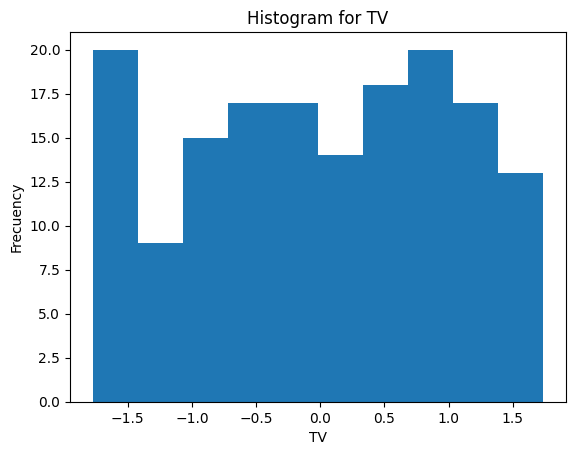

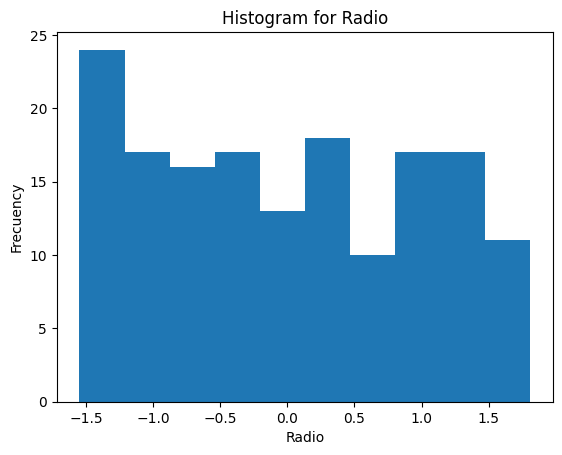

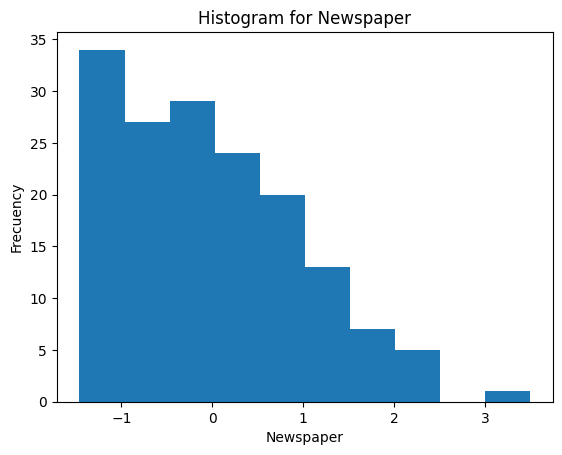

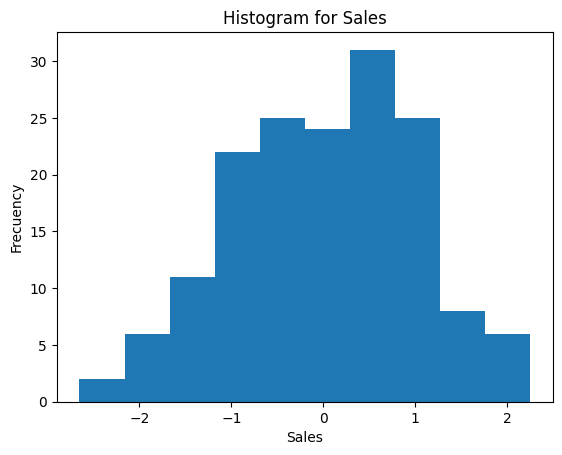

In [ ]:
for column in processed_train_data.columns:
  plt.hist(processed_train_data[column])
  plt.xlabel(column)
  plt.ylabel('Frecuency')
  plt.title(f'Histogram for {column}')
  plt.show()


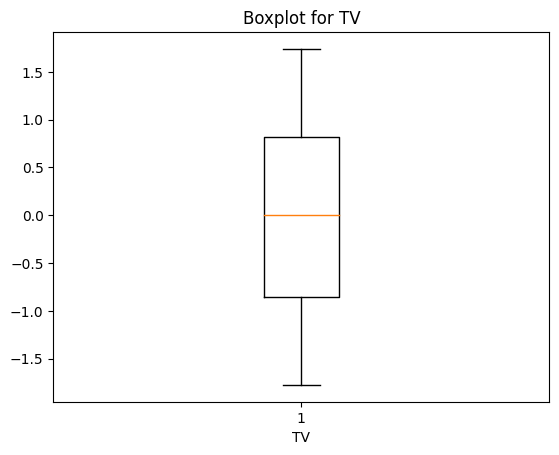

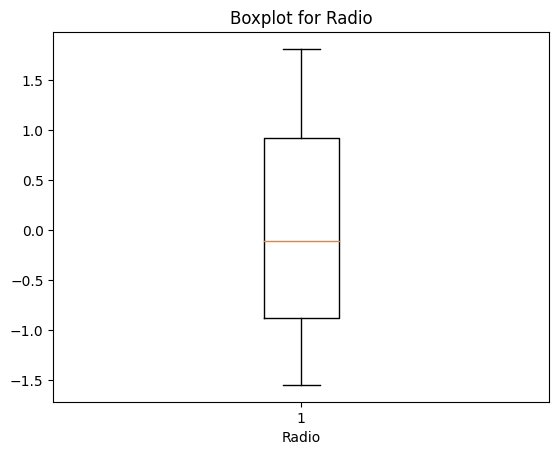

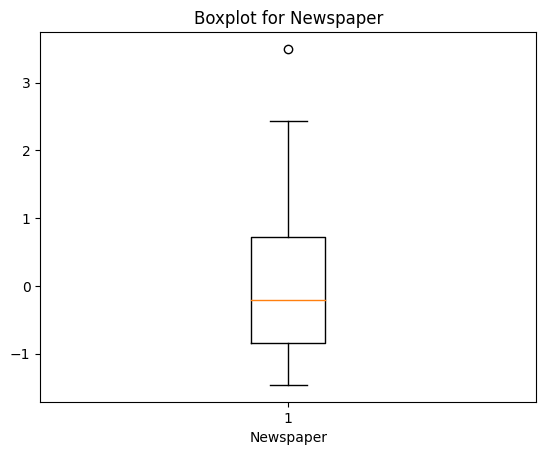

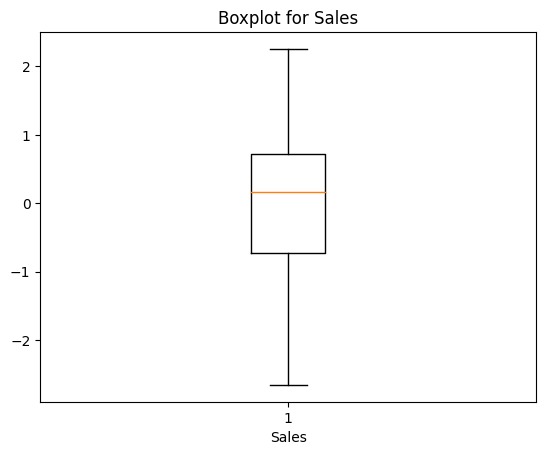

In [ ]:
for column in processed_train_data.columns:
  plt.boxplot(processed_train_data[column])
  plt.xlabel(column)
  plt.title(f'Boxplot for {column}')
  plt.show()

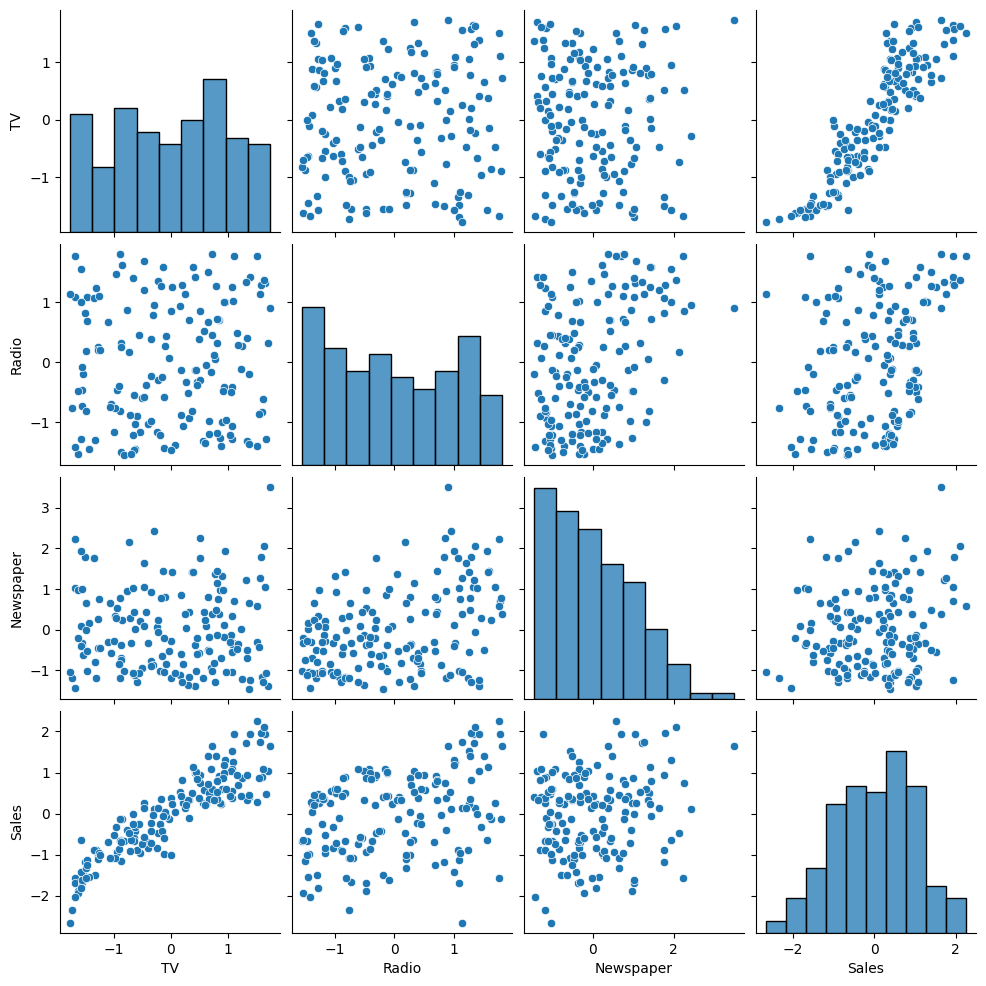

In [ ]:
sns.pairplot(processed_train_data)

In [ ]:
correlation = processed_train_data.corr()
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.053872,0.019084,0.901935
Radio,0.053872,1.000000,0.388074,0.342118
Newspaper,0.019084,0.388074,1.000000,0.145578
Sales,0.901935,0.342118,0.145578,1.000000


<Axes: >

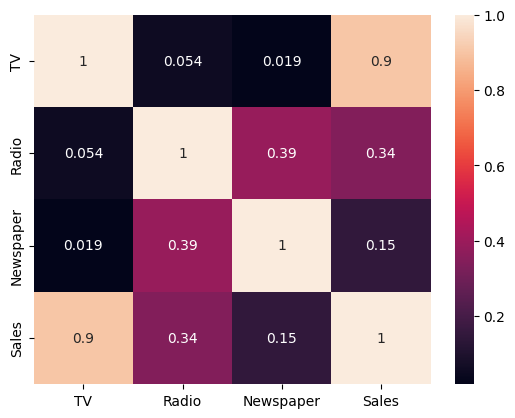

In [ ]:
sns.heatmap(correlation, annot=True)

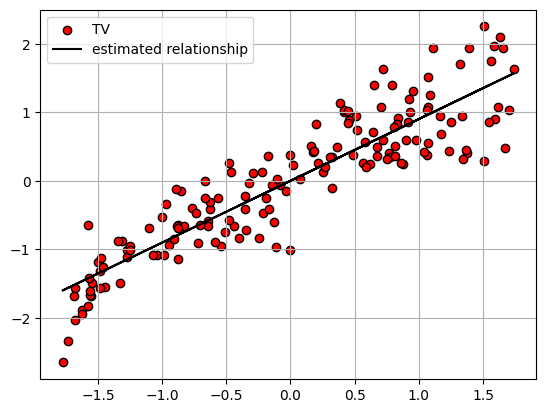

estimated: f(x) = [0.90193492]x + -6.647177842339487e-18


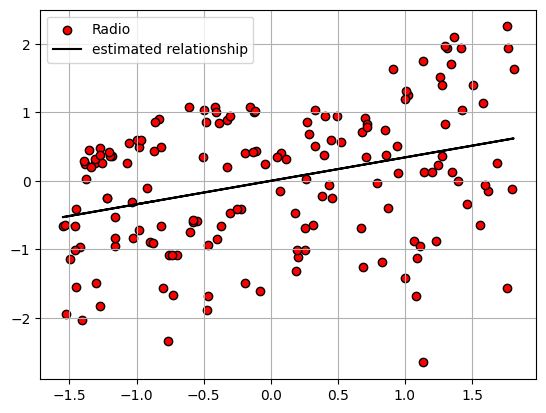

estimated: f(x) = [0.34211835]x + -2.0078695373918966e-16


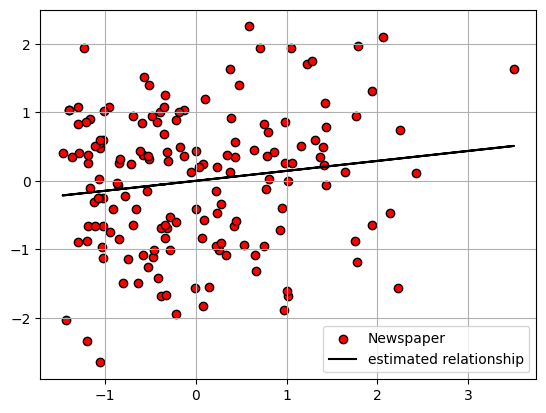

estimated: f(x) = [0.14557781]x + -2.744289985200603e-16


In [ ]:
x = processed_train_data[['TV', 'Radio', 'Newspaper']]
y = processed_train_data['Sales']

models = []
scores_ols = []
for column in x.columns:
  model_ols = LinearRegression()
  model_ols.fit(x[[column]], y)

  models.append(model_ols)
  scores_ols.append(model_ols.score(x[[column]], y))

n = 0
for column in x.columns:
  estimated_function_ols = lambda x: models[n].coef_ * x + models[n].intercept_
  plt.scatter(x[[column]], y, label=column, color='r', edgecolor='black')
  plt.plot(x[[column]], estimated_function_ols(x[[column]]), label='estimated relationship', color='black')
  plt.legend()
  plt.grid()
  plt.show()
  print(f'estimated: f(x) = {models[n].coef_}x + {models[n].intercept_}')
  n = n+1

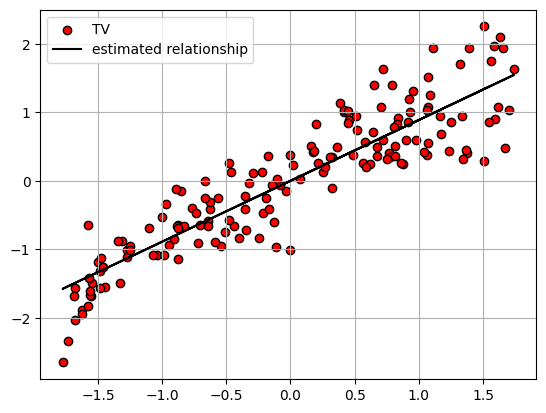

estimated: f(x) = [0.88847614]x + [-0.00012361]


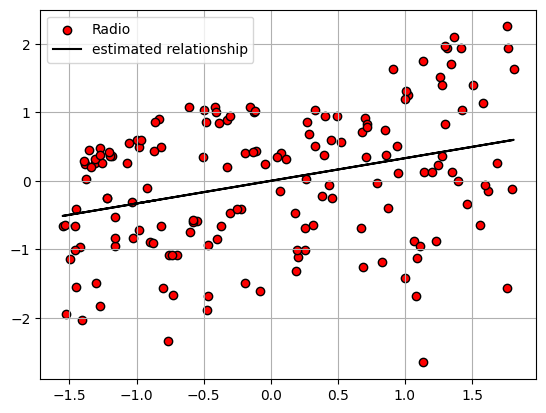

estimated: f(x) = [0.3305938]x + [9.86410399e-05]


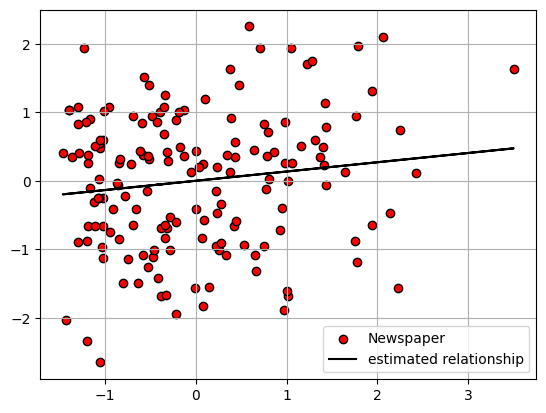

estimated: f(x) = [0.13538614]x + [0.00068946]


In [ ]:
models_sgd = []
scores_sgd = []
for column in x.columns:
  model_sgd = SGDRegressor()
  model_sgd.fit(x[[column]], y)

  models_sgd.append(model_sgd)
  scores_sgd.append(model_sgd.score(x[[column]], y))

n = 0
for column in x.columns:
  estimated_function_sgd = lambda x: models_sgd[n].coef_ * x + models_sgd[n].intercept_
  plt.scatter(x[[column]], y, label=column, color='r', edgecolor='black')
  plt.plot(x[[column]], estimated_function_sgd(x[[column]]), label='estimated relationship', color='black')
  plt.legend()
  plt.grid()
  plt.show()
  print(f'estimated: f(x) = {models_sgd[n].coef_}x + {models_sgd[n].intercept_}')
  n = n+1

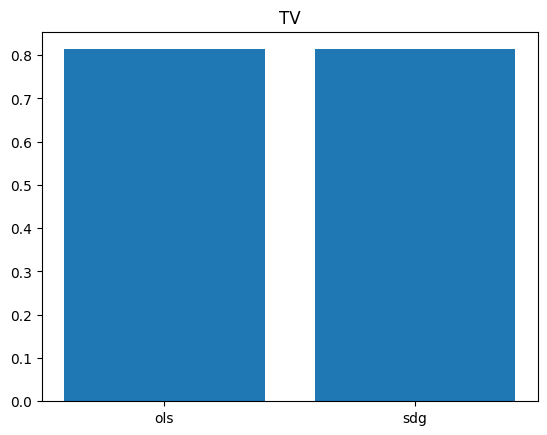

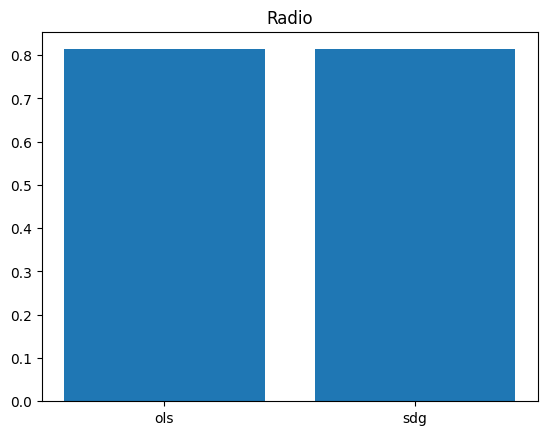

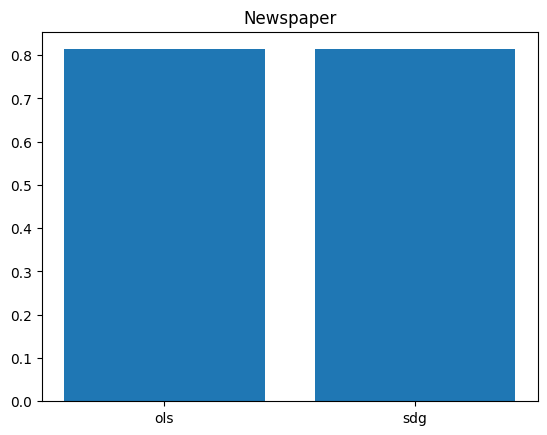

In [ ]:
n = 0
for column in x.columns:
  values=[scores_ols[n], scores_sgd[n]]
  plt.bar([0,1] , values)
  plt.xticks(range(len(values)), labels=['ols', 'sdg'])
  plt.title(column)
  plt.show()
